# Customer attrition for xyv Bank
### To fine out customers who are like to stop banking with us before they do , so we can specifically target 
### them with adverts, promo or values etc


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
os.listdir()

['.ipynb_checkpoints', 'customer_churn.ipynb', 'data_one.csv']

In [4]:
# Read the data frame
df = pd.read_csv('data_one.csv', delimiter=',')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### feature selection

after observing the dataset I found out that the colums like Surname, rownumber and customer_id are customer specific and will not help our analysis

In [10]:
data = df.drop(['RowNumber','CustomerId','Surname'], axis = 1)
data.head()
#df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Gender and Geography are categorical columns and need to be converted to numerical columns

In [11]:
# we can use the replace function for gender bcolumn because it has only to unique values hence the algorithm will not assume ordinal relationship
# Male = 1 and Female = 2
data['Gender'].replace(to_replace=['Male','Female'], value=[1,0],inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# the geography column has three unique values hence we use one hot encoding to avoid ordinal relationship by the algorithm
Feature = data.drop(['Geography','Exited'], axis = 1)
Feature = pd.concat([Feature,pd.get_dummies(data['Geography'])], axis=1)
Feature.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
Target = data['Exited'].values

### scaling the data

In [14]:
from   sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
Feature_scaled = preprocessing.StandardScaler().fit(Feature).transform(Feature)
Feature_scaled[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.32622142, -1.09598752,  0.29351742, -1.04175968, -1.22584767,
        -0.91158349,  0.64609167,  0.97024255,  0.02188649,  0.99720391,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, -1.38753759,  0.11735002,
        -0.91158349, -1.54776799,  0.97024255,  0.21653375, -1.00280393,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742,  1.03290776,  1.33305335,
         2.52705662,  0.64609167, -1.03067011,  0.2406869 ,  0.99720391,
        -0.57873591, -0.57380915],
       [ 0.50152063, -1.09598752,  0.00745665, -1.38753759, -1.22584767,
         0.80773656, -1.54776799, -1.03067011, -0.10891792,  0.99720391,
        -0.57873591, -0.57380915],
       [ 2.06388377, -1.09598752,  0.38887101, -1.04175968,  0.7857279 ,
        -0.91158349,  0.64609167,  0.97024255, -0.36527578, -1.00280393,
        -0.57873591,  1.74273971]])

### Customer attrtion using Random Forest

In [15]:
X_rfc = Feature_scaled.copy()

In [16]:
y_rfc = Target.copy()

splitting the data into train and test data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size = 0.2, random_state = 0)

### fitting the random forest calssifier model

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)         # fitting the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### use the fitted model to predict the text data

In [19]:
rct_predict = classifier.predict(X_test) #using the model to predict the the test dataset

### check model performance against top 30 rows

In [51]:
print(y_test[:30])
print(rct_predict[:30])
##print('test_set churn_top_30_rows {}' + y_test.values[:30])
##print('predicted churn_top_30_rows {} ' + rct_predict[:30])

[0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### model evaluation

In [52]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,rct_predict ))  
print('Model accuracy : ' + str(accuracy_score(y_test, rct_predict )))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.77      0.52      0.62       405

   micro avg       0.87      0.87      0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

Model accuracy : 0.8715


### feature evaluation to see what feature has most effect on our model

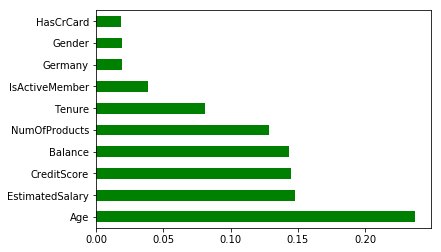

In [53]:
feat_importances = pd.Series(classifier.feature_importances_, index=Feature.columns)
feat_importances.nlargest(10).plot(kind='barh', color = 'green')

### Customer attrition using K nearest neighbor

In [54]:
#scaled features
X_knn = Feature_scaled.copy()
X_knn[:5]

array([[-0.32622142, -1.09598752,  0.29351742, -1.04175968, -1.22584767,
        -0.91158349,  0.64609167,  0.97024255,  0.02188649,  0.99720391,
        -0.57873591, -0.57380915],
       [-0.44003595, -1.09598752,  0.19816383, -1.38753759,  0.11735002,
        -0.91158349, -1.54776799,  0.97024255,  0.21653375, -1.00280393,
        -0.57873591,  1.74273971],
       [-1.53679418, -1.09598752,  0.29351742,  1.03290776,  1.33305335,
         2.52705662,  0.64609167, -1.03067011,  0.2406869 ,  0.99720391,
        -0.57873591, -0.57380915],
       [ 0.50152063, -1.09598752,  0.00745665, -1.38753759, -1.22584767,
         0.80773656, -1.54776799, -1.03067011, -0.10891792,  0.99720391,
        -0.57873591, -0.57380915],
       [ 2.06388377, -1.09598752,  0.38887101, -1.04175968,  0.7857279 ,
        -0.91158349,  0.64609167,  0.97024255, -0.36527578, -1.00280393,
        -0.57873591,  1.74273971]])

In [55]:
#scaled target
y_knn = Target.copy()
y_knn[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [56]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split( X_knn, y_knn, test_size=0.3, random_state=4)
print ('Train set:', X_train_knn.shape,  y_train_knn.shape)
print ('Test set:', X_test_knn.shape,  y_test_knn.shape)

Train set: (7000, 12) (7000,)
Test set: (3000, 12) (3000,)


### finding the value of K with best accuracy 

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_knn,y_train_knn)
    yhat_knn=neigh.predict(X_test_knn)
    mean_acc[n-1] = metrics.accuracy_score(y_test_knn, yhat_knn)

    std_acc[n-1]=np.std(yhat_knn==y_test_knn)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.79866667, 0.83366667, 0.82866667, 0.83366667, 0.839     ,
       0.84066667, 0.844     , 0.842     , 0.84533333, 0.84166667])

### plot model accuracy for different values of K

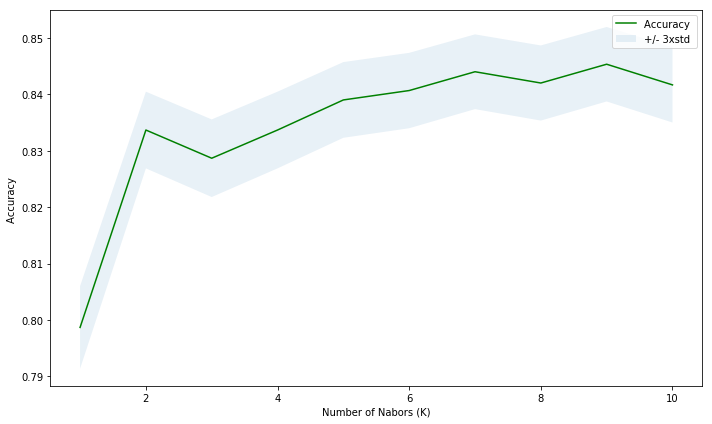

In [58]:
#plotting k against mean model accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [59]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8453333333333334 with k= 9


### Creating the KNN model with  the best value of K = 4

In [60]:
## Training the model K = 4
k = 9
#Train Model and Predict  
neigh_k9 = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,y_train_knn)
neigh_k9

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Using The Model Trained to predict customer churn

In [61]:
yhat_knn = neigh_k9.predict(X_test_knn)

check model performace against to 30 rows

In [62]:
print(y_test_knn[:30])
print(yhat_knn[:30])

[0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]


In [73]:
from sklearn.metrics import jaccard_similarity_score , f1_score, accuracy_score, log_loss, confusion_matrix
import itertools

print("Model Accuracy: ", accuracy_score(y_test_knn, yhat_knn))
print("F1 Score: " ,f1_score(y_test_knn, yhat_knn, average='weighted'))
print("jaccard_similarity_score: ",jaccard_similarity_score(y_test_knn, yhat_knn))
print("log_loss: " ,log_loss(y_test_knn, yhat_knn))

Model Accuracy:  0.8453333333333334
F1 Score:  0.8233367121507472
jaccard_similarity_score:  0.8453333333333334
log_loss:  5.342019537941754


In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_knn, yhat_knn, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test_knn, yhat_knn))


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.71      0.35      0.47       584

   micro avg       0.85      0.85      0.85      3000
   macro avg       0.78      0.66      0.69      3000
weighted avg       0.83      0.85      0.82      3000



In [75]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[2333   83]
 [ 381  203]]


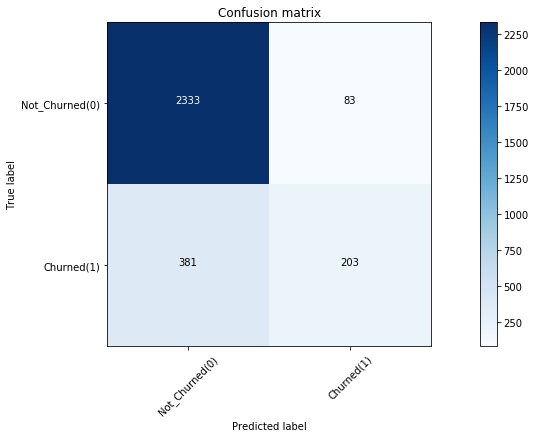

In [82]:
# Plot non-normalized confusion matrix
plt.figure(figsize= (14,6))
plot_confusion_matrix(cnf_matrix, classes=['Not_Churned(0)','Churned(1)'],normalize= False,  title='Confusion matrix')